In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,cross_val_score
import xgboost as xgb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
data_path='/content/drive/My Drive/Projects/housing_train.csv'

In [0]:
data=pd.read_csv(data_path)

In [5]:
data.head(2)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al


In [6]:
data.shape

(265190, 22)

In [7]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [0]:
data.drop(columns=['id','url','region_url','image_url','description'],inplace=True)

In [9]:
data.shape

(265190, 17)

In [10]:
data.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'state'],
      dtype='object')

In [11]:
data.head(2)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al


In [12]:
data.isnull().sum()

region                         0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
lat                         1419
long                        1419
state                          1
dtype: int64

In [13]:
regions_list=data.region.unique()
len(regions_list)

298

In [14]:
regions_dict = {val : idx + 1 for idx, val in enumerate(regions_list)}
regions_dict

{'SF bay area': 48,
 'akron / canton': 272,
 'albany': 92,
 'albuquerque': 242,
 'ames': 122,
 'anchorage / mat-su': 9,
 'ann arbor': 176,
 'annapolis': 167,
 'asheville': 204,
 'ashtabula': 282,
 'athens': 90,
 'atlanta': 87,
 'augusta': 88,
 'bakersfield': 18,
 'baltimore': 168,
 'baton rouge': 145,
 'battle creek': 177,
 'bemidji': 189,
 'bend': 287,
 'billings': 215,
 'binghamton': 256,
 'birmingham': 1,
 'bismarck': 273,
 'bloomington': 115,
 'bloomington-normal': 104,
 'boise': 99,
 'boone': 214,
 'boston': 171,
 'boulder': 35,
 'bowling green': 139,
 'bozeman': 226,
 'brainerd': 196,
 'brunswick': 89,
 'buffalo': 243,
 'butte': 231,
 'cape cod / islands': 187,
 'catskills': 250,
 'cedar rapids': 131,
 'central NJ': 238,
 'central louisiana': 162,
 'central michigan': 190,
 'champaign urbana': 105,
 'charlotte': 213,
 'chautauqua': 262,
 'chicago': 106,
 'chico': 33,
 'chillicothe': 284,
 'cincinnati': 270,
 'cleveland': 276,
 'clovis / portales': 260,
 'colorado springs': 52,
 '

In [0]:
#Mapping codes to their categories
data['region_code'] = data['region'].map(regions_dict)

In [16]:
data.type.unique()

array(['apartment', 'house', 'manufactured', 'townhouse', 'condo',
       'duplex', 'flat', 'cottage/cabin', 'in-law', 'loft', 'land',
       'assisted living'], dtype=object)

In [17]:
housetype_list=data.type.unique()
len(housetype_list)

12

In [0]:
housetype_dict = {val : idx + 1 for idx, val in enumerate(housetype_list)}

In [0]:
#Mapping codes to their categories
data['type_code'] = data['type'].map(housetype_dict)

In [20]:
laundry_list=data.laundry_options.unique()
len(laundry_list)

6

In [0]:
laundry_dict = {val : idx + 1 for idx, val in enumerate(laundry_list)}

In [0]:
#Mapping codes to their categories
data['laundry_options_code'] = data['laundry_options'].map(laundry_dict)

In [23]:
parking_list=data.parking_options.unique()
len(parking_list)

8

In [0]:
parking_dict = {val : idx + 1 for idx, val in enumerate(parking_list)}

In [0]:
#Mapping codes to their categories
data['parking_options_code'] = data['parking_options'].map(parking_dict)

In [26]:
data.state.unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'mi', 'md',
       'ma', 'mn', 'ms', 'nc', 'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'oh', 'nd', 'ok', 'or', nan], dtype=object)

In [27]:
state_list=data.state.unique()
len(state_list)

39

In [0]:
state_dict = {val : idx + 1 for idx, val in enumerate(state_list)}

In [0]:
#Mapping codes to their categories
data['state_code'] = data['state'].map(state_dict)

In [30]:
data.head(2)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,region_code,type_code,laundry_options_code,parking_options_code,state_code
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al,1,1,1,1,1
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al,1,1,1,2,1


In [31]:
#Checking min Values
for i in ['region','price','type_code','sqfeet','beds','baths','cats_allowed','dogs_allowed','smoking_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','laundry_options_code','parking_options_code','lat','long','state_code']:
  print('lowest value in column',i,'is',data[i].min())

lowest value in column region is SF bay area
lowest value in column price is 0
lowest value in column type_code is 1
lowest value in column sqfeet is 0
lowest value in column beds is 0
lowest value in column baths is 0.0
lowest value in column cats_allowed is 0
lowest value in column dogs_allowed is 0
lowest value in column smoking_allowed is 0
lowest value in column wheelchair_access is 0
lowest value in column electric_vehicle_charge is 0
lowest value in column comes_furnished is 0
lowest value in column laundry_options_code is 1
lowest value in column parking_options_code is 1
lowest value in column lat is -43.5333
lowest value in column long is -163.894
lowest value in column state_code is 1


In [0]:
#Checking max Values
for i in ['region','price','type_code','sqfeet','beds','baths','cats_allowed','dogs_allowed','smoking_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','laundry_options_code','parking_options_code','lat','long','state_code']:
  print('heighest value in column',i,'is',data[i].max())

heighest value in column region is zanesville / cambridge
heighest value in column price is 2768307249
heighest value in column type_code is 12
heighest value in column sqfeet is 8388607
heighest value in column beds is 1100
heighest value in column baths is 75.0
heighest value in column cats_allowed is 1
heighest value in column dogs_allowed is 1
heighest value in column smoking_allowed is 1
heighest value in column wheelchair_access is 1
heighest value in column electric_vehicle_charge is 1
heighest value in column comes_furnished is 1
heighest value in column laundry_options_code is 6
heighest value in column parking_options_code is 8
heighest value in column lat is 102.036
heighest value in column long is 172.63299999999998
heighest value in column state_code is 39


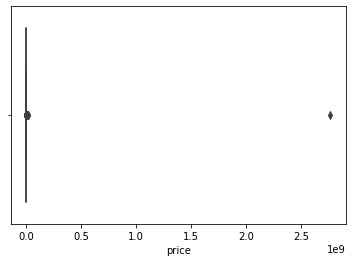

In [0]:
sns.boxplot(x=data['price'])

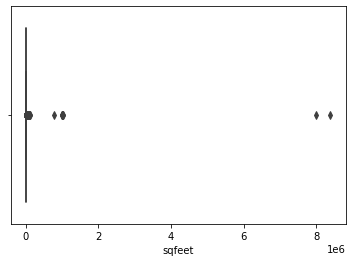

In [0]:
sns.boxplot(x=data['sqfeet'])

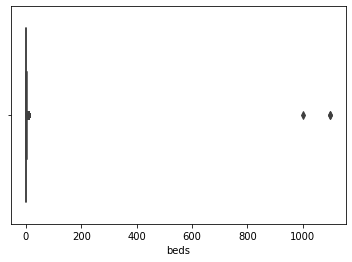

In [0]:
sns.boxplot(x=data['beds'])

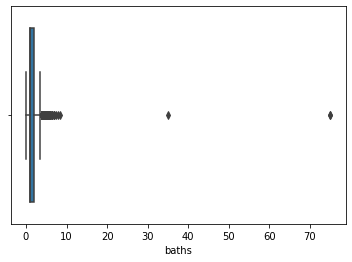

In [0]:
sns.boxplot(x=data['baths'])

In [0]:
for col in ['price', 'sqfeet', 'beds', 'baths']:
    InterQuartileRange=iqr(data[col])
    print('InterQuartileRange for',col,' =',InterQuartileRange)
    InterQuartileRangeLower=np.quantile(data[col], .25)
    print('InterQuartileRangeLower for',col,' =',InterQuartileRangeLower)
    InterQuartileRangeHigher=np.quantile(data[col], .75)
    print('InterQuartileRangeHigher for ',col,' =',InterQuartileRangeHigher)
    print('Max of ',col,' =',data[col].max())
    print('Min of ',col,' =',data[col].min())
    print('Lower Limit for ',col,' =',InterQuartileRangeLower-(1.5*InterQuartileRange))
    print('Upper Limit ',col,' =',InterQuartileRangeHigher+(1.5*InterQuartileRange))
    InRange=0
    OutRange=0
    for i in data[col]:
        if((InterQuartileRangeLower-(1.5*InterQuartileRange))<=i<=(InterQuartileRangeHigher+(1.5*InterQuartileRange))):
            InRange=InRange+1
        else:
            OutRange=OutRange+1
    print('InRange for ',col,' =',InRange)
    print('OutRange for ',col,' =',OutRange)

InterQuartileRange for price  = 633.0
InterQuartileRangeLower for price  = 817.0
InterQuartileRangeHigher for  price  = 1450.0
Max of  price  = 2768307249
Min of  price  = 0
Lower Limit for  price  = -132.5
Upper Limit  price  = 2399.5
InRange for  price  = 251767
OutRange for  price  = 13423
InterQuartileRange for sqfeet  = 404.0
InterQuartileRangeLower for sqfeet  = 752.0
InterQuartileRangeHigher for  sqfeet  = 1156.0
Max of  sqfeet  = 8388607
Min of  sqfeet  = 0
Lower Limit for  sqfeet  = 146.0
Upper Limit  sqfeet  = 1762.0
InRange for  sqfeet  = 253978
OutRange for  sqfeet  = 11212
InterQuartileRange for beds  = 1.0
InterQuartileRangeLower for beds  = 1.0
InterQuartileRangeHigher for  beds  = 2.0
Max of  beds  = 1100
Min of  beds  = 0
Lower Limit for  beds  = -0.5
Upper Limit  beds  = 3.5
InRange for  beds  = 255173
OutRange for  beds  = 10017
InterQuartileRange for baths  = 1.0
InterQuartileRangeLower for baths  = 1.0
InterQuartileRangeHigher for  baths  = 2.0
Max of  baths  = 75.

In [0]:
#Latitude and Longitude validation:-
#The valid range of latitude in degrees is -90 and +90 for the southern and northern hemisphere respectively. 
#The valid range of Longitude in degrees is -180 and +180 for the west and east of the Prime Meridian, respectively
lat_count=0
long_count=0
for col in ['lat','long']:
  for la in data['lat']:  
    if la<-90 or la>90:
      lat_count=lat_count+1
      print('Latitude -',la)
  for lo in data['long']:
    if lo<-180 or lo>180:
      long_count=long_count+1
      print('Longitude -',lo)
print('Invalid Latitudes count =',lat_count)
print('Invalid Longitudes count =',long_count)

Latitude - 102.036
Latitude - 102.036
Latitude - 102.036
Latitude - 102.036
Latitude - 102.036
Latitude - 102.036
Latitude - 102.036
Latitude - 102.036
Invalid Latitudes count = 8
Invalid Longitudes count = 0


In [0]:
data.beds.value_counts(dropna=False)

2       120149
1        80527
3        46968
4         8177
0         7529
5         1590
6          185
7           40
8           22
1100         2
1000         1
Name: beds, dtype: int64

In [0]:
data.baths.value_counts(dropna=False)

1.0     136375
2.0      93726
1.5      18476
2.5       8185
3.0       4272
0.0       2045
4.0       1147
3.5        652
4.5        145
5.0        108
5.5         28
6.0         17
6.5          4
7.0          4
75.0         2
8.0          1
35.0         1
8.5          1
7.5          1
Name: baths, dtype: int64

In [0]:
data.laundry_options.value_counts(dropna=False)

w/d in unit           91074
NaN                   54311
w/d hookups           50252
laundry on site       39186
laundry in bldg       27816
no laundry on site     2551
Name: laundry_options, dtype: int64

In [0]:
data.parking_options.value_counts(dropna=False)

NaN                   95135
off-street parking    88316
carport               28685
attached garage       27591
detached garage       12798
street parking        10570
no parking             1973
valet parking           122
Name: parking_options, dtype: int64

In [32]:
data_Clean=data.loc[
    (data['price']>-132.5) & (data['price']<2399.5) &
    (data['sqfeet']>146.0) & (data['sqfeet']<1762.0) &
    (data['beds']>0) & (data['beds']<4) &
    (data['baths']>0) & (data['baths']<4) &
    (data['lat']>-90) & (data['lat']<90) &
    (data['long']>-180) & (data['long']<180)
]
data_Clean.shape

(228384, 22)

In [0]:
data.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'state', 'region_code', 'type_code',
       'laundry_options_code', 'parking_options_code', 'state_code'],
      dtype='object')

In [0]:
data_Clean.isnull().sum()

region                         0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            46595
parking_options            83938
lat                            0
long                           0
state                          0
region_code                    0
type_code                      0
laundry_options_code           0
parking_options_code           0
state_code                     0
dtype: int64

In [0]:
cols = [col for col in data.columns if col not in ['type','region','laundry_options','parking_options','state','price']]
X=data_Clean[cols]
Y=data_Clean['price']

In [0]:
X.isnull().sum()

sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
lat                        0
long                       0
region_code                0
type_code                  0
laundry_options_code       0
parking_options_code       0
state_code                 0
dtype: int64

In [34]:
print(X.shape)
print(Y.shape)

(228384, 16)
(228384,)


In [0]:
X.columns

Index(['sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'lat', 'long', 'region_code', 'type_code',
       'laundry_options_code', 'parking_options_code', 'state_code'],
      dtype='object')

In [0]:
X.head(2)

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,region_code,type_code,laundry_options_code,parking_options_code,state_code
1,1319,3,2.0,1,1,1,0,0,0,33.3755,-86.8045,1,1,1,2,1
2,1133,1,1.5,1,1,1,0,0,0,33.4226,-86.7065,1,1,1,1,1


Variance Retained = [0.9121276  0.08381003]


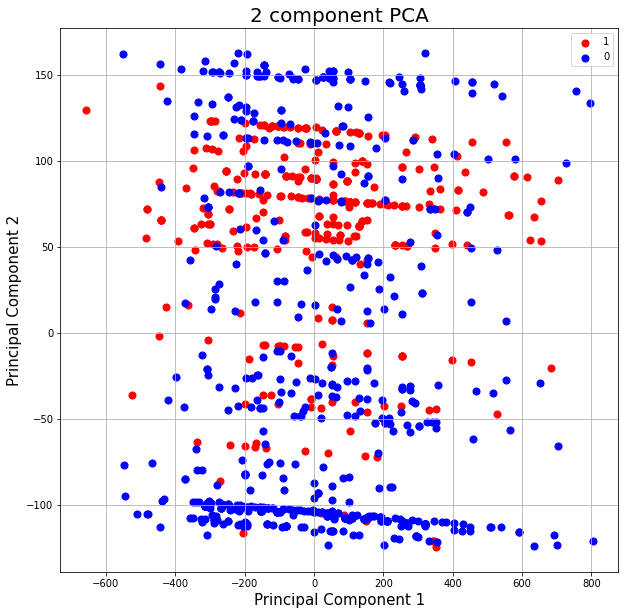

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
print('Variance Retained =',pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, Y], axis = 1)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r',  'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['price'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

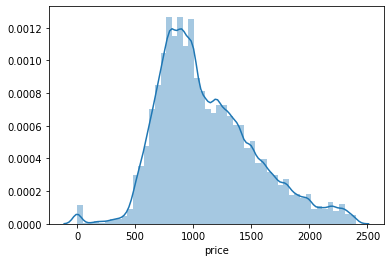

In [0]:
sns.distplot(Y)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

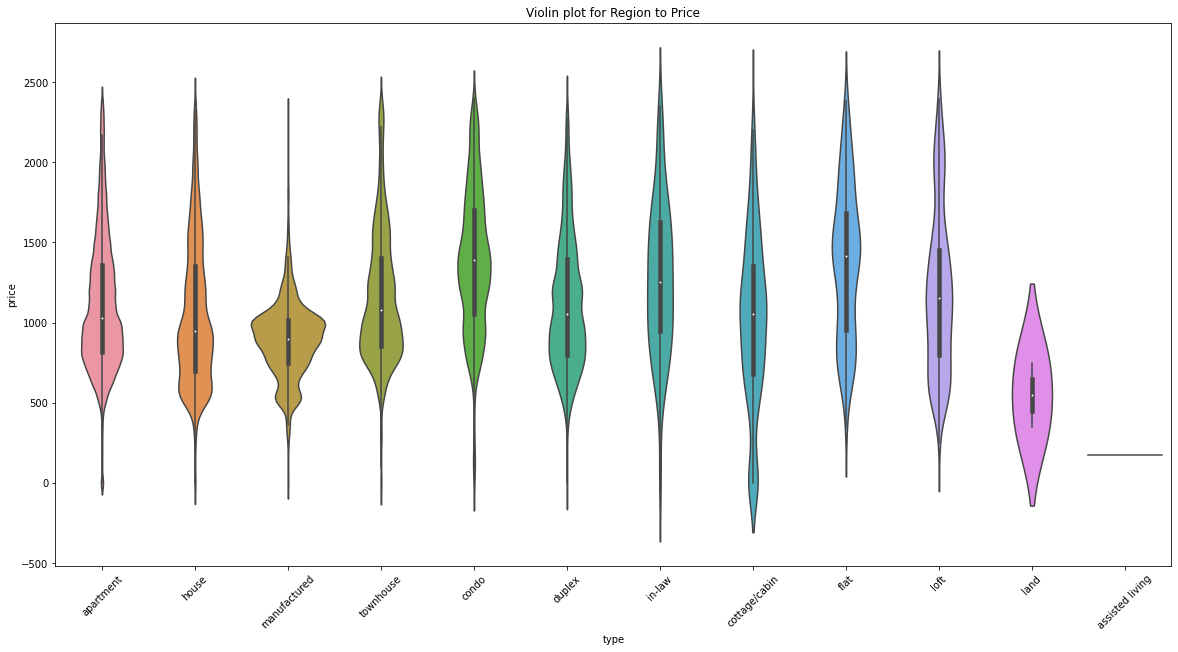

In [0]:
plt.figure(figsize=(20,10), facecolor='w', edgecolor='k')
sns.violinplot(data_Clean['type'], Y)
plt.title("Violin plot for House Type to Price")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

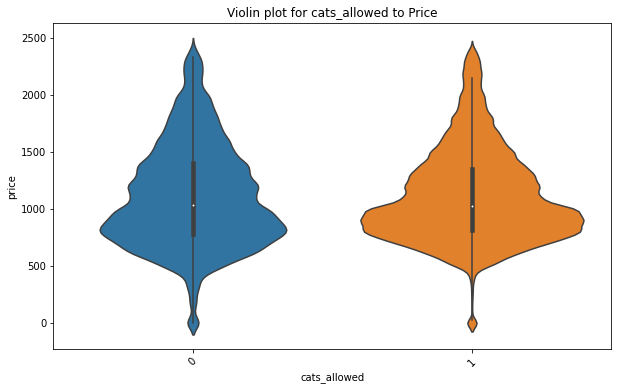

In [0]:
plt.figure(figsize=(10,6), facecolor='w', edgecolor='k')
sns.violinplot(data_Clean['cats_allowed'], Y)
plt.title("Violin plot for cats_allowed to Price")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

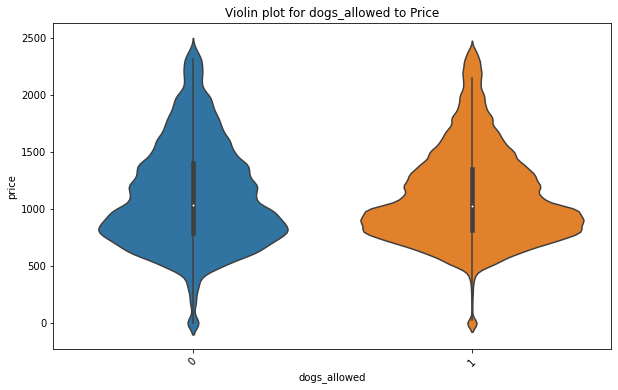

In [0]:
plt.figure(figsize=(10,6), facecolor='w', edgecolor='k')
sns.violinplot(data_Clean['dogs_allowed'], Y)
plt.title("Violin plot for dogs_allowed to Price")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

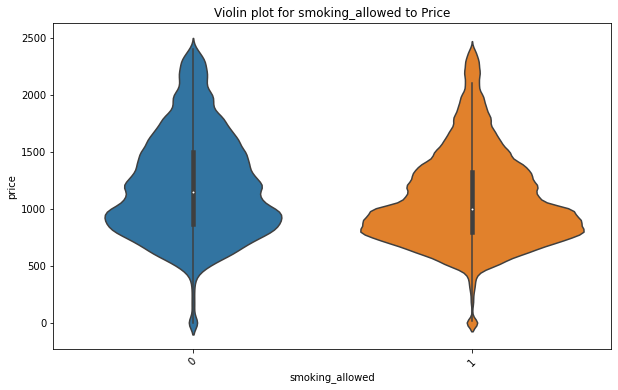

In [0]:
plt.figure(figsize=(10,6), facecolor='w', edgecolor='k')
sns.violinplot(data_Clean['smoking_allowed'], Y)
plt.title("Violin plot for smoking_allowed to Price")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

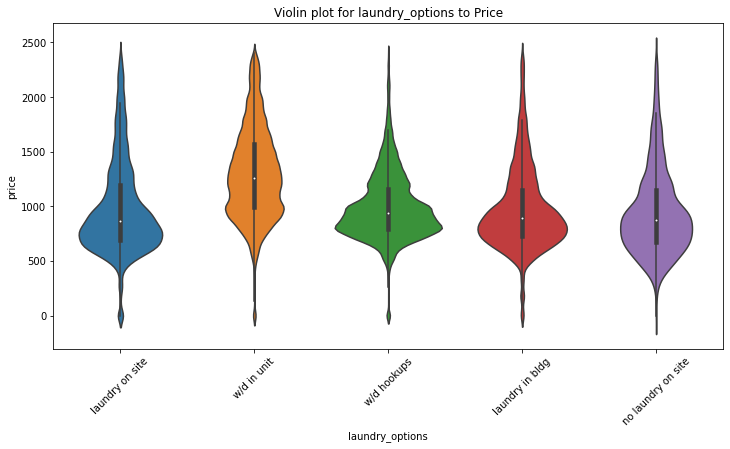

In [0]:
plt.figure(figsize=(12,6), facecolor='w', edgecolor='k')
sns.violinplot(data_Clean['laundry_options'], Y)
plt.title("Violin plot for laundry_options to Price")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

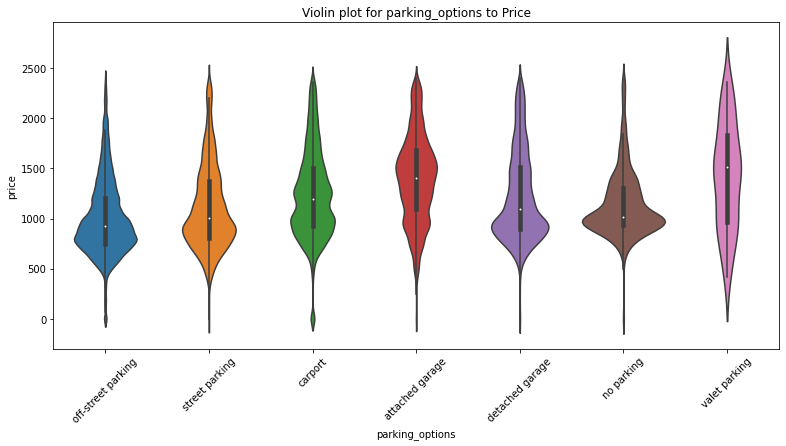

In [0]:
plt.figure(figsize=(13,6), facecolor='w', edgecolor='k')
sns.violinplot(data_Clean['parking_options'], Y)
plt.title("Violin plot for parking_options to Price")
plt.xticks(rotation=45)

In [0]:
CDSWEF = data[(data.cats_allowed==1) & (data.dogs_allowed==1) & (data.smoking_allowed==1) & (data.wheelchair_access==1) & (data.electric_vehicle_charge==1) & (data.comes_furnished==1)]
CDSWE = data[(data.cats_allowed==1) & (data.dogs_allowed==1) & (data.smoking_allowed==1) & (data.wheelchair_access==1) & (data.electric_vehicle_charge==1)]
CDSW = data[(data.cats_allowed==1) & (data.dogs_allowed==1) & (data.smoking_allowed==1) & (data.wheelchair_access==1)]
CDS = data[(data.cats_allowed==1) & (data.dogs_allowed==1) & (data.smoking_allowed==1)]
CD = data[(data.cats_allowed==1) & (data.dogs_allowed==1)]
C = data[(data.cats_allowed==1)]
D = data[(data.dogs_allowed==1)]
S = data[(data.smoking_allowed==1)]
W = data[(data.wheelchair_access==1)]
E = data[(data.electric_vehicle_charge==1)]
F = data[(data.comes_furnished==1)]


No_CDSWEF = data[(data.cats_allowed==0) & (data.dogs_allowed==0) & (data.smoking_allowed==0) & (data.wheelchair_access==0) & (data.electric_vehicle_charge==0) & (data.comes_furnished==0)]
No_CDSWE = data[(data.cats_allowed==0) & (data.dogs_allowed==0) & (data.smoking_allowed==0) & (data.wheelchair_access==0) & (data.electric_vehicle_charge==0)]
No_CDSW = data[(data.cats_allowed==0) & (data.dogs_allowed==0) & (data.smoking_allowed==0) & (data.wheelchair_access==0)]
No_CDS = data[(data.cats_allowed==0) & (data.dogs_allowed==0) & (data.smoking_allowed==0)]
No_CD = data[(data.cats_allowed==0) & (data.dogs_allowed==0)]
No_C = data[(data.cats_allowed==0)]
No_D = data[(data.dogs_allowed==0)]
No_S = data[(data.smoking_allowed==0)]
No_W = data[(data.wheelchair_access==0)]
No_E = data[(data.electric_vehicle_charge==0)]
No_F = data[(data.comes_furnished==0)]

facilities_avg_prices=[CDSWEF['price'].mean(),CDSWE['price'].mean(),CDSW['price'].mean(),CDS['price'].mean(),CD['price'].mean(),
                       C['price'].mean(),D['price'].mean(),S['price'].mean(),W['price'].mean(),E['price'].mean(),F['price'].mean(),
                       No_CDSWEF['price'].mean(),No_CDSWE['price'].mean(),No_CDSW['price'].mean(),No_CDS['price'].mean(),No_CD['price'].mean(),
                       No_C['price'].mean(),No_D['price'].mean(),No_S['price'].mean(),No_W['price'].mean(),No_E['price'].mean(),No_F['price'].mean()]
facilities_avg_prices

[1184.8996655518395,
 1528.8122503328896,
 5246.333414337789,
 22122.918366141443,
 16892.8081329542,
 16348.925215945796,
 16639.28909472818,
 16045.668264636064,
 3683.625442880398,
 2070.9038865546217,
 2078.214573643411,
 2092.929229587919,
 2512.2981893927254,
 2505.3528664443384,
 3049.6992284103276,
 1857.1076329151106,
 1954.903776499414,
 2249.998024157471,
 1867.673662283188,
 13007.162563854868,
 12421.482894767047,
 12794.122145150423]

<BarContainer object of 22 artists>

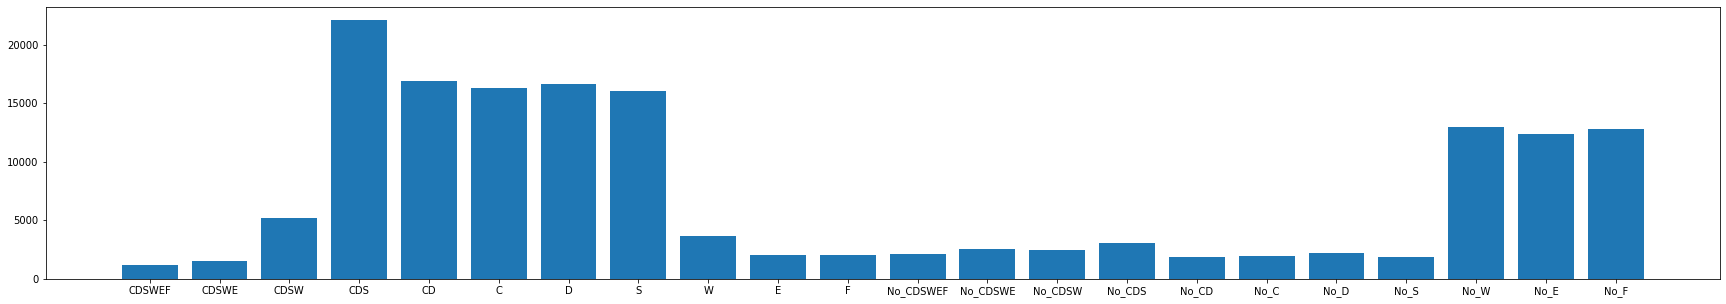

In [0]:
plt.figure(figsize=(30,5))
plt.bar(['CDSWEF','CDSWE','CDSW','CDS','CD','C','D','S','W','E','F',
         'No_CDSWEF','No_CDSWE','No_CDSW','No_CDS','No_CD','No_C','No_D','No_S','No_W','No_E','No_F']
        ,facilities_avg_prices)

In [0]:
facility_providers=[CDSWEF['price'].shape[0],CDSWE['price'].shape[0],CDSW['price'].shape[0],CDS['price'].shape[0],CD['price'].shape[0],
                       C['price'].shape[0],D['price'].shape[0],S['price'].shape[0],W['price'].shape[0],E['price'].shape[0],F['price'].shape[0],
                       No_CDSWEF['price'].shape[0],No_CDSWE['price'].shape[0],No_CDSW['price'].shape[0],No_CDS['price'].shape[0],No_CD['price'].shape[0],
                       No_C['price'].shape[0],No_D['price'].shape[0],No_S['price'].shape[0],No_W['price'].shape[0],No_E['price'].shape[0],No_F['price'].shape[0]]
facility_providers

[299,
 751,
 8230,
 135434,
 181115,
 190094,
 184718,
 194622,
 20886,
 3808,
 12900,
 15628,
 18723,
 18891,
 20218,
 71493,
 75096,
 80472,
 70568,
 244304,
 261382,
 252290]

<BarContainer object of 22 artists>

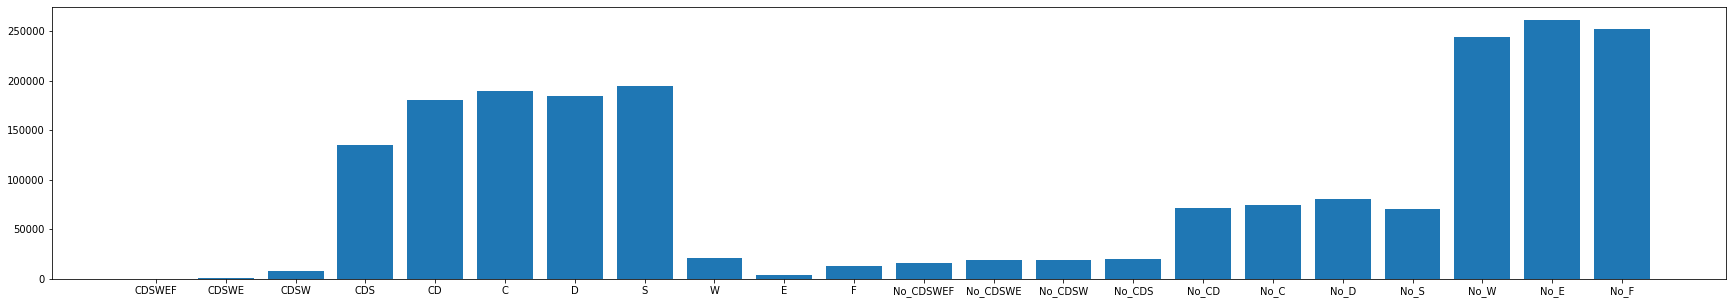

In [0]:
plt.figure(figsize=(30,5))
plt.bar(['CDSWEF','CDSWE','CDSW','CDS','CD','C','D','S','W','E','F',
         'No_CDSWEF','No_CDSWE','No_CDSW','No_CDS','No_CD','No_C','No_D','No_S','No_W','No_E','No_F']
        ,facility_providers)

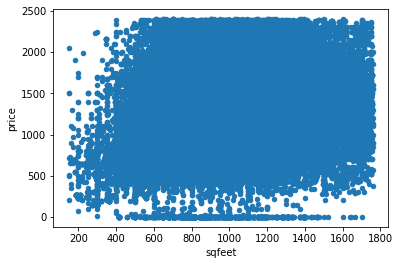

In [0]:
data_Clean.plot.scatter(x='sqfeet', y='price')

In [0]:
data_Clean.skew(axis=0).sort_values(ascending= False).head(10)

electric_vehicle_charge    9.580032
comes_furnished            4.862309
type_code                  3.738097
wheelchair_access          3.297790
parking_options_code       0.997566
price                      0.670955
baths                      0.546536
sqfeet                     0.409423
lat                        0.370195
long                       0.358802
dtype: float64

In [0]:
data_Clean.kurt(axis=0).sort_values(ascending= False).head(10)

electric_vehicle_charge    89.777802
comes_furnished            21.642238
long                       16.270418
type_code                  15.976563
wheelchair_access           8.875500
lat                         1.930075
parking_options_code        0.736397
price                       0.298955
sqfeet                      0.034018
smoking_allowed            -0.639006
dtype: float64

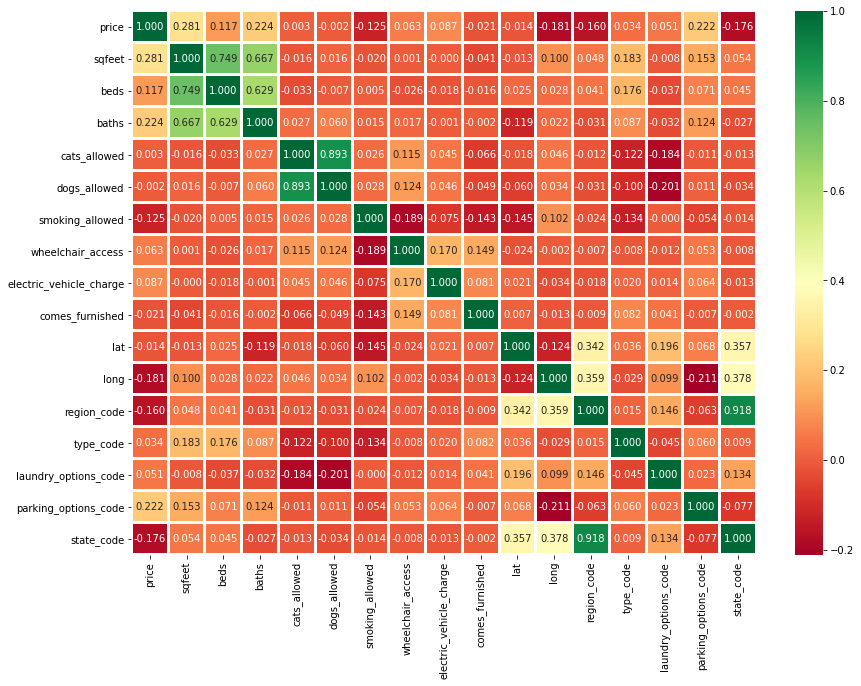

In [0]:
plt.figure(figsize=(14,10))
sns.heatmap(data_Clean.corr(),annot=True,cmap='RdYlGn',fmt='.3f',linewidths=2)
plt.show()

In [0]:
#Correlation with output variable
cor_target = abs(data_Clean.corr()["price"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.10]
relevant_features

price                   1.000000
sqfeet                  0.281386
beds                    0.116928
baths                   0.224453
smoking_allowed         0.125196
long                    0.180634
region_code             0.159683
parking_options_code    0.222191
state_code              0.175727
Name: price, dtype: float64

In [0]:
#Normalizing the data
#normalized_X = preprocessing.normalize(X)
#print('Normalized data')

In [35]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print('X_train shape =',X_train.shape)
print('X_test shape =',X_test.shape)
print('Y_train shape =',Y_train.shape)
print('Y_test shape =',Y_test.shape)

X_train shape = (153017, 16)
X_test shape = (75367, 16)
Y_train shape = (153017,)
Y_test shape = (75367,)


In [0]:
#Declaring these for comparision between models
predictions=pd.DataFrame()
MeanAbsoluteError_dict={}
MeanSquaredError_dict={}
RootMeanSquaredError_dict={}
R2Score_dict={}
TestR2Score_dict={}
CrossValScore_dict={}

In [0]:
def consolidator(modelInstance,ModelName,X_train,Y_train,X_test,Y_test,Y_Pred):
  predictions[ModelName] = Y_Pred

  print(ModelName,'Model:-')

  R2Score = modelInstance.score(X_train, Y_train)
  TestR2Score = modelInstance.score(X_test, Y_test)
  MeanAbsErr = mean_absolute_error(Y_test, Y_Pred)
  MeanSqErr =  mean_squared_error(Y_test, Y_Pred)
  RootMeanSqErr = np.sqrt(mean_squared_error(Y_test, Y_Pred))
  
  print("R^2 Score: ", R2Score)
  print("Test R^2 Score: ", TestR2Score)
  print('Mean Absolute Error :', MeanAbsErr)  
  print('Mean Squared Error :', MeanSqErr)  
  print('Root Mean Squared Error :', RootMeanSqErr)

  R2Score_dict[ModelName] = R2Score
  TestR2Score_dict[ModelName] = TestR2Score
  MeanAbsoluteError_dict[ModelName] =  MeanAbsErr
  MeanSquaredError_dict[ModelName] = MeanSqErr
  RootMeanSquaredError_dict[ModelName] = RootMeanSqErr

#Random Forest Regressor

In [0]:
RFR = RandomForestRegressor()
param_grid = {'n_estimators': [2500],
              'max_features': [9],
              'min_samples_leaf': [2]}

grid_search = GridSearchCV(estimator = RFR, param_grid = param_grid,cv=3,verbose=2)
RFR_GS = grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] max_features=9, min_samples_leaf=2, n_estimators=2500 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=9, min_samples_leaf=2, n_estimators=2500, total=12.7min
[CV] max_features=9, min_samples_leaf=2, n_estimators=2500 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.7min remaining:    0.0s


[CV]  max_features=9, min_samples_leaf=2, n_estimators=2500, total=12.4min
[CV] max_features=9, min_samples_leaf=2, n_estimators=2500 ...........
[CV]  max_features=9, min_samples_leaf=2, n_estimators=2500, total=12.4min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 38.3min finished


In [0]:
RFR_GS.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=9, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
Y_pred_RFR = RFR_GS.predict(X_test)

In [0]:
consolidator(RFR_GS,'RandomForestRegressor',X_train,Y_train,X_test,Y_test,Y_pred_RFR)

RandomForestRegressor Model:-
R^2 Score:  0.9655910372252507
Test R^2 Score:  0.9042719240145839
Mean Absolute Error : 62.84021691634147
Mean Squared Error : 16755.930018584637
Root Mean Squared Error : 129.44469868860847


#Gradient Boosting Regressor

In [38]:
GBR = GradientBoostingRegressor()
param_grid = {'n_estimators': [2500],
             'learning_rate': [0.45],
             'max_features': [10,16]}

grid_search = GridSearchCV(estimator = GBR, param_grid = param_grid,cv=3,verbose=2)
GBR_GS = grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] learning_rate=0.45, max_features=10, n_estimators=2500 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.45, max_features=10, n_estimators=2500, total= 4.1min
[CV] learning_rate=0.45, max_features=10, n_estimators=2500 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min remaining:    0.0s


[CV]  learning_rate=0.45, max_features=10, n_estimators=2500, total= 4.1min
[CV] learning_rate=0.45, max_features=10, n_estimators=2500 ..........
[CV]  learning_rate=0.45, max_features=10, n_estimators=2500, total= 4.0min
[CV] learning_rate=0.45, max_features=16, n_estimators=2500 ..........
[CV]  learning_rate=0.45, max_features=16, n_estimators=2500, total= 6.2min
[CV] learning_rate=0.45, max_features=16, n_estimators=2500 ..........
[CV]  learning_rate=0.45, max_features=16, n_estimators=2500, total= 6.2min
[CV] learning_rate=0.45, max_features=16, n_estimators=2500 ..........
[CV]  learning_rate=0.45, max_features=16, n_estimators=2500, total= 6.3min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 30.9min finished


In [39]:
GBR_GS.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.45, loss='ls', max_depth=3,
                          max_features=16, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
Y_pred_GBR = GBR_GS.predict(X_test)

In [41]:
consolidator(GBR_GS,'GradientBoostingRegressor',X_train,Y_train,X_test,Y_test,Y_pred_GBR)

GradientBoostingRegressor Model:-
R^2 Score:  0.9238839876101257
Test R^2 Score:  0.8776184383697879
Mean Absolute Error : 87.873170968641
Mean Squared Error : 21421.269164057387
Root Mean Squared Error : 146.36006683538167


#Ada Boosting Regressor

In [0]:
ABR = AdaBoostRegressor()
param_grid = {'n_estimators': [100],
             'learning_rate': [0.06]}

grid_search = GridSearchCV(estimator = ABR, param_grid = param_grid,cv=3,verbose=2)
ABR_GS = grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] learning_rate=0.06, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. learning_rate=0.06, n_estimators=100, total=  21.7s
[CV] learning_rate=0.06, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.7s remaining:    0.0s


[CV] ............. learning_rate=0.06, n_estimators=100, total=  21.8s
[CV] learning_rate=0.06, n_estimators=100 ............................
[CV] ............. learning_rate=0.06, n_estimators=100, total=  22.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min finished


In [0]:
ABR_GS.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.06, loss='linear',
                  n_estimators=100, random_state=None)

In [0]:
Y_pred_ABR = ABR_GS.predict(X_test)

In [0]:
consolidator(ABR_GS,'AdaBoostRegressor',X_train,Y_train,X_test,Y_test,Y_pred_ABR)

AdaBoostRegressor Model:-
R^2 Score:  0.4168772045712308
Test R^2 Score:  0.41860178118031377
Mean Absolute Error : 246.55461296219815
Mean Squared Error : 101766.04686964113
Root Mean Squared Error : 319.007910355905


#Extra Trees Regressor

In [0]:
ETR = ExtraTreesRegressor()
param_grid = {'n_estimators': [2500],
              'max_features': [10],
              'min_samples_leaf': [2]}

grid_search = GridSearchCV(estimator = ETR, param_grid = param_grid,cv=3,verbose=2)
ETR_GS = grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] max_features=10, min_samples_leaf=2, n_estimators=2500 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=10, min_samples_leaf=2, n_estimators=2500, total= 9.0min
[CV] max_features=10, min_samples_leaf=2, n_estimators=2500 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.0min remaining:    0.0s


[CV]  max_features=10, min_samples_leaf=2, n_estimators=2500, total= 9.0min
[CV] max_features=10, min_samples_leaf=2, n_estimators=2500 ..........
[CV]  max_features=10, min_samples_leaf=2, n_estimators=2500, total= 8.9min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 27.5min finished


In [0]:
ETR_GS.best_estimator_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features=10, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=2,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=2500, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [0]:
Y_pred_ETR = ETR_GS.predict(X_test)

In [0]:
consolidator(ETR_GS,'ExtraTreesRegressor',X_train,Y_train,X_test,Y_test,Y_pred_ETR)

ExtraTreesRegressor Model:-
R^2 Score:  0.9688601602518521
Test R^2 Score:  0.8956715712038935
Mean Absolute Error : 66.71498000870243
Mean Squared Error : 18261.307707916032
Root Mean Squared Error : 135.1344060848903


#XG Boost Regressor

In [42]:
XGR = xgb.XGBRegressor()
param_grid = {"objective":['reg:squarederror'],
              'colsample_bytree': [0.7],
              'learning_rate': [0.06],
              'max_depth': [10], 
              'alpha': [1], 
              'n_estimators':[2500]}

grid_search = GridSearchCV(estimator = XGR, param_grid = param_grid,cv=3, verbose=2)
XGR_GS = grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] alpha=1, colsample_bytree=0.7, learning_rate=0.06, max_depth=10, n_estimators=2500, objective=reg:squarederror 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=1, colsample_bytree=0.7, learning_rate=0.06, max_depth=10, n_estimators=2500, objective=reg:squarederror, total= 7.4min
[CV] alpha=1, colsample_bytree=0.7, learning_rate=0.06, max_depth=10, n_estimators=2500, objective=reg:squarederror 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.4min remaining:    0.0s


[CV]  alpha=1, colsample_bytree=0.7, learning_rate=0.06, max_depth=10, n_estimators=2500, objective=reg:squarederror, total= 7.4min
[CV] alpha=1, colsample_bytree=0.7, learning_rate=0.06, max_depth=10, n_estimators=2500, objective=reg:squarederror 
[CV]  alpha=1, colsample_bytree=0.7, learning_rate=0.06, max_depth=10, n_estimators=2500, objective=reg:squarederror, total= 7.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 22.5min finished


In [43]:
XGR_GS.best_estimator_

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
Y_pred_XGR = XGR_GS.predict(X_test)

In [45]:
consolidator(XGR_GS,'XGBRegressor',X_train,Y_train,X_test,Y_test,Y_pred_XGR)

XGBRegressor Model:-
R^2 Score:  0.9861214666719935
Test R^2 Score:  0.9185450122048104
Mean Absolute Error : 58.94088072821763
Mean Squared Error : 14257.6152409957
Root Mean Squared Error : 119.40525633738115


#Linear Regression

In [0]:
LR = LinearRegression()
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid_search = GridSearchCV(estimator = LR, param_grid = param_grid,cv=3,verbose=2)
LR_GS = grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV] .. copy_X=True, fit_intercept=True, normalize=True, total=   0.1s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV] .. copy_X=True, fit_intercept=True, normalize=True, total=   0.1s
[CV] copy_X=True, fit_intercept=True, normalize=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .. copy_X=True, fit_intercept=True, normalize=True, total=   0.1s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV] . copy_X=True, fit_intercept=True, normalize=False, total=   0.1s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV] . copy_X=True, fit_intercept=True, normalize=False, total=   0.1s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV] . copy_X=True, fit_intercept=True, normalize=False, total=   0.1s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV] . copy_X=True, fit_intercept=False, normalize=True, total=   0.1s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV] . copy_X=True, fit_intercept=False, normalize=True, total=   0.1s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV] . copy_X=True, fit_intercept=False, normalize=True, total=   0.1s
[CV] copy_X=True, fit_intercept=False, normalize=False ...............
[CV]  

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.7s finished


In [0]:
LR_GS.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
Y_pred_LR = LR_GS.predict(X_test)

In [0]:
consolidator(LR_GS,'LinearRegression',X_train,Y_train,X_test,Y_test,Y_pred_LR)

LinearRegression Model:-
R^2 Score:  0.20245017659898915
Test R^2 Score:  0.20722847479802142
Mean Absolute Error : 287.3333219087496
Mean Squared Error : 138764.14061674743
Root Mean Squared Error : 372.510591281305


ShortCut

In [0]:
R2Score_dict['RandomForestRegressor'] = 0.9655910372252507
TestR2Score_dict['RandomForestRegressor'] = 0.9042719240145839
MeanAbsoluteError_dict['RandomForestRegressor'] =  62.84021691634147
MeanSquaredError_dict['RandomForestRegressor'] = 16755.930018584637
RootMeanSquaredError_dict['RandomForestRegressor'] = 129.44469868860847

In [0]:
R2Score_dict['GradientBoostingRegressor'] = 0.9152695802311643
TestR2Score_dict['GradientBoostingRegressor'] = 0.8743503063456916
MeanAbsoluteError_dict['GradientBoostingRegressor'] =  90.2763534972296
MeanSquaredError_dict['GradientBoostingRegressor'] = 21993.312328234184
RootMeanSquaredError_dict['GradientBoostingRegressor'] = 148.30142389145894

In [0]:
R2Score_dict['AdaBoostRegressor'] = 0.4168772045712308
TestR2Score_dict['AdaBoostRegressor'] = 0.41860178118031377
MeanAbsoluteError_dict['AdaBoostRegressor'] =  246.55461296219815
MeanSquaredError_dict['AdaBoostRegressor'] = 101766.04686964113
RootMeanSquaredError_dict['AdaBoostRegressor'] = 319.007910355905

In [0]:
R2Score_dict['ExtraTreesRegressor'] = 0.9688601602518521
TestR2Score_dict['ExtraTreesRegressor'] = 0.8956715712038935
MeanAbsoluteError_dict['ExtraTreesRegressor'] =  66.71498000870243
MeanSquaredError_dict['ExtraTreesRegressor'] = 18261.307707916032
RootMeanSquaredError_dict['ExtraTreesRegressor'] = 135.1344060848903

In [0]:
R2Score_dict['XGBRegressor'] = 0.987842322331159
TestR2Score_dict['XGBRegressor'] = 0.919236010948618
MeanAbsoluteError_dict['XGBRegressor'] =  57.619332777632835
MeanSquaredError_dict['XGBRegressor'] = 14136.665075905861
RootMeanSquaredError_dict['XGBRegressor'] = 118.89770845523417

In [0]:
R2Score_dict['LinearRegression'] = 0.20245017659898915
TestR2Score_dict['LinearRegression'] = 0.20722847479802142
MeanAbsoluteError_dict['LinearRegression'] =  287.3333219087496
MeanSquaredError_dict['LinearRegression'] = 138764.14061674743
RootMeanSquaredError_dict['LinearRegression'] = 372.510591281305

#Visualizing Predictions

In [0]:
predictions['Actual']=Y_test.values

In [0]:
predictions.head(10)

,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,XGBRegressor,LinearRegression,Actual
0,1347.665478,1251.603818,1320.586430,1310.626953,1389.104690,1200
1,1167.492861,1159.761803,1177.640608,1176.894653,1414.097110,1180
2,1022.327520,1154.906924,957.238729,952.178650,1044.961260,930
3,713.124852,961.453527,718.096503,715.841614,1050.461244,699
4,1298.562999,929.009809,1339.184260,1341.494263,902.168675,1341
5,813.385731,942.973230,750.689996,760.809387,1141.233375,752
6,1012.101071,1386.329717,1100.362648,1119.362793,967.571357,950
7,686.936588,989.498412,640.516571,639.388977,1193.551693,640
8,1169.469012,1156.258793,1224.959552,1313.944336,1362.500259,1370
9,1565.990193,1246.635681,1509.014543,1523.302612,1225.565890,1475


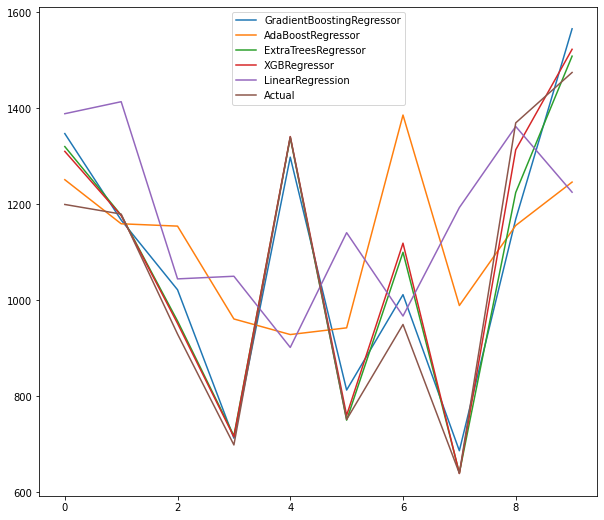

In [0]:
predictions.head(10).plot.line(figsize=(10,9))

In [0]:
Errors=pd.DataFrame()
Errors['MeanAbsoluteError']=list(MeanAbsoluteError_dict.values())
Errors['MeanSquaredError']=list(MeanSquaredError_dict.values())
Errors['RootMeanSquaredError']=list(RootMeanSquaredError_dict.values())
Errors['R2Score']=list(R2Score_dict.values())
Errors['TestR2Score']=list(TestR2Score_dict.values())
Errors.index = ['RndmFrst','GrdntBst','AdaBst','ExtTrs','XGBst','Linear']
Errors

,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError,R2Score,TestR2Score
RndmFrst,62.840217,16755.930019,129.444699,0.965591,0.904272
GrdntBst,90.276353,21993.312328,148.301424,0.915270,0.874350
AdaBst,246.554613,101766.046870,319.007910,0.416877,0.418602
ExtTrs,66.714980,18261.307708,135.134406,0.968860,0.895672
XGBst,57.619333,14136.665076,118.897708,0.987842,0.919236
Linear,287.333322,138764.140617,372.510591,0.202450,0.207228


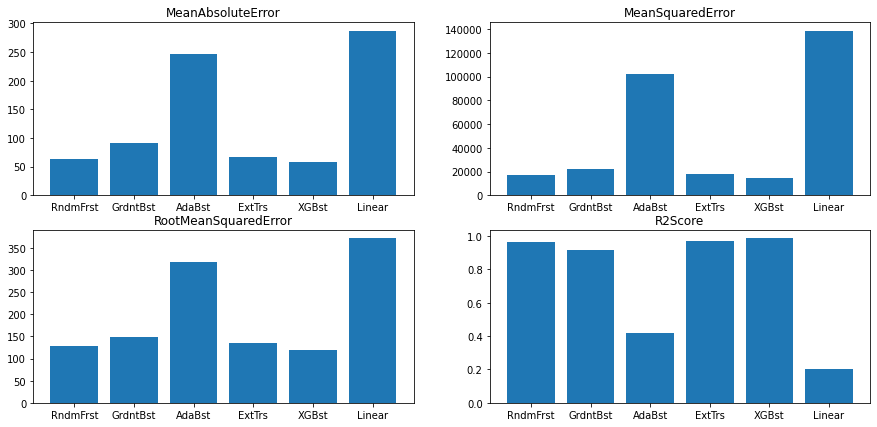

In [0]:
fig, axis = plt.subplots(2,2,figsize=(15,7))

axis[0,0].bar(Errors.index,Errors['MeanAbsoluteError'])
axis[0,1].bar(Errors.index,Errors['MeanSquaredError'])
axis[1,0].bar(Errors.index,Errors['RootMeanSquaredError'])
axis[1,1].bar(Errors.index,Errors['R2Score'])
axis[0,0].title.set_text('MeanAbsoluteError')
axis[0,1].title.set_text('MeanSquaredError')
axis[1,0].title.set_text('RootMeanSquaredError')
axis[1,1].title.set_text('R2Score')

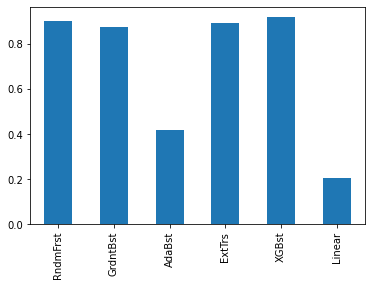

In [0]:
Errors['TestR2Score'].plot.bar()

Save Best Model